# INSOFYS Stock Price Prediction

In [50]:
!pip install quandl

Defaulting to user installation because normal site-packages is not writeable


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [100]:
# import modules
import quandl
from datetime import datetime
import matplotlib.pyplot as plt

# initialize parameters
start = datetime(2012, 1, 1)
end = datetime(2018, 12, 31)

# get the data
df = quandl.get('NSE/INFY', start_date = start,
    end_date = end,
    authtoken = 'M7pW4Yzt9PNfd1F4A8uG')

In [101]:
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2012-01-02,2759.2,2816.65,2742.00,2808.0,2808.95,728272.0,20258.04
2012-01-03,2824.1,2886.95,2820.00,2865.2,2864.30,1112876.0,31860.66
2012-01-04,2845.0,2875.00,2841.05,2845.0,2854.40,917678.0,26206.27
2012-01-05,2839.2,2876.00,2831.45,2840.0,2840.15,890659.0,25418.18
2012-01-06,2838.0,2867.60,2811.10,2829.1,2832.15,885954.0,25119.10


In [102]:
df.tail()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-12-24,657.00,658.80,647.60,648.50,649.00,8379825.0,54685.63
2018-12-26,647.00,647.00,637.35,643.90,644.05,6178552.0,39651.61
2018-12-27,652.75,663.25,649.00,656.35,656.80,15333902.0,100921.27
2018-12-28,663.35,663.50,653.30,656.10,656.95,4736598.0,31180.77
2018-12-31,660.00,662.00,655.80,659.60,658.95,3373319.0,22239.20


In [103]:
df.shape

(1734, 7)

In [104]:
df1=df.reset_index()['Close']

In [105]:
df1.shape

(1734,)

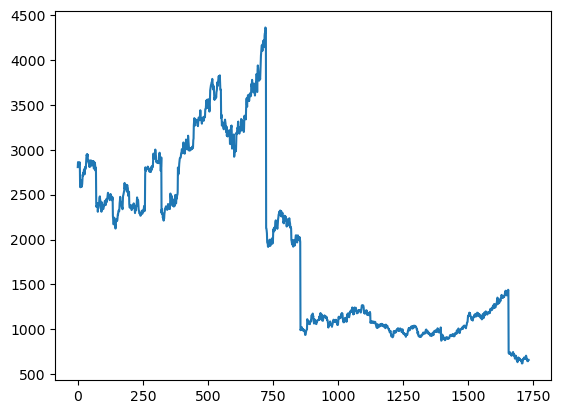

In [107]:
plt.plot(df1)

LSTM are sensitive to the scale of the data, so we apply MinMaxScaler

In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

Splitting the dataset into train and test split

In [112]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [116]:
training_size,test_size

(1127, 607)

In [117]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX),np.array(dataY)

In [118]:
time_step=100
X_train,y_train=create_dataset(train_data, time_step)
X_test,y_test=create_dataset(test_data, time_step)

In [119]:
print(X_train.shape), print(y_train.shape)

(1026, 100)
(1026,)


(None, None)

In [120]:
print(X_test.shape), print(y_test.shape)

(506, 100)
(506,)


(None, None)

Reshaping Input to be [samples, time_steps, features] which is required for LSTM

In [121]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

Creating the Stacked LSTM Model

In [126]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.13.0-cp311-cp311-win_amd64.whl (1.9 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
                                              0.0/276.6 MB ? eta -:--:--
                                              0.3/276.6 MB 9.9 MB/s eta 0:00:28
                                              0.6/276.6 MB 9.1 MB/s eta 0:00:31
                                             1.1/276.6 MB 10.4 MB/s eta 0:00:27
                                             1.5/276.6 MB 10.8 MB/s eta 0:00:26
                                             1.9/276.6 MB 10.2 MB/s eta 0:00:27
                                             2.4/276.6 MB 10.2 MB/s eta 0:00:27
                                             2.9/276.6 MB 10.8 MB/s eta 0:00:26
                                             3.3/276.6 MB 11.2 MB/s eta 0:00:25
                                             3.9/276.6 MB 11.2 MB/s eta 0:00:25
                                             4.2/276.6 MB 11.1 MB/s eta 0:00:25
                                             4.8/

     -----------------------                173.3/276.6 MB 1.0 MB/s eta 0:01:43
     -----------------------                173.3/276.6 MB 1.0 MB/s eta 0:01:43
     -----------------------                173.3/276.6 MB 1.0 MB/s eta 0:01:43
     -----------------------                173.3/276.6 MB 1.0 MB/s eta 0:01:43
     ----------------------               173.6/276.6 MB 947.5 kB/s eta 0:01:49
     ----------------------               174.3/276.6 MB 944.8 kB/s eta 0:01:49
     ----------------------               174.3/276.6 MB 944.8 kB/s eta 0:01:49
     ----------------------               174.3/276.6 MB 944.8 kB/s eta 0:01:49
     ----------------------               174.3/276.6 MB 944.8 kB/s eta 0:01:49
     ----------------------               174.3/276.6 MB 944.8 kB/s eta 0:01:49
     ----------------------               174.3/276.6 MB 944.8 kB/s eta 0:01:49
     ----------------------               174.3/276.6 MB 944.8 kB/s eta 0:01:49
     ----------------------             

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.13.0-cp311-cp311-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl (276.6 MB)


In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [131]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [132]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [133]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 24s 578ms/step - loss: 0.0562 - val_loss: 0.0037
Epoch 2/100
17/17 [==============================] - 6s 354ms/step - loss: 0.0097 - val_loss: 0.0020
Epoch 3/100
17/17 [==============================] - 6s 364ms/step - loss: 0.0058 - val_loss: 7.2882e-04
Epoch 4/100
17/17 [==============================] - 6s 371ms/step - loss: 0.0050 - val_loss: 8.7655e-04
Epoch 5/100
17/17 [==============================] - 6s 348ms/step - loss: 0.0049 - val_loss: 7.9533e-04
Epoch 6/100
17/17 [==============================] - 6s 372ms/step - loss: 0.0048 - val_loss: 6.4462e-04
Epoch 7/100
17/17 [==============================] - 6s 347ms/step - loss: 0.0043 - val_loss: 6.1524e-04
Epoch 8/100
17/17 [==============================] - 6s 335ms/step - loss: 0.0043 - val_loss: 5.8891e-04
Epoch 9/100
17/17 [==============================] - 6s 352ms/step - loss: 0.0040 - val_loss: 5.6636e-04
Epoch 10/100
17/17 [==============================] - 6s 347ms

17/17 [==============================] - 6s 348ms/step - loss: 9.4485e-04 - val_loss: 2.5842e-04
Epoch 79/100
17/17 [==============================] - 6s 346ms/step - loss: 8.9466e-04 - val_loss: 2.5101e-04
Epoch 80/100
17/17 [==============================] - 6s 355ms/step - loss: 0.0011 - val_loss: 2.4550e-04
Epoch 81/100
17/17 [==============================] - 6s 355ms/step - loss: 9.4276e-04 - val_loss: 2.5004e-04
Epoch 82/100
17/17 [==============================] - 6s 347ms/step - loss: 8.5684e-04 - val_loss: 3.5485e-04
Epoch 83/100
17/17 [==============================] - 6s 369ms/step - loss: 8.2948e-04 - val_loss: 2.7173e-04
Epoch 84/100
17/17 [==============================] - 6s 367ms/step - loss: 8.2958e-04 - val_loss: 2.4997e-04
Epoch 85/100
17/17 [==============================] - 6s 352ms/step - loss: 7.9449e-04 - val_loss: 2.3857e-04
Epoch 86/100
17/17 [==============================] - 6s 353ms/step - loss: 9.2326e-04 - val_loss: 2.6111e-04
Epoch 87/100
17/17 [=======

Lets do the prediction and check performance metrics

In [134]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

16/16 [==============================] - 1s 81ms/step


Transformback to original form

In [135]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

Calculate RMSE performance metrics

In [136]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2480.4324978019017

In [138]:
math.sqrt(mean_squared_error(y_test,test_predict))

1035.6181490819033

Plotting

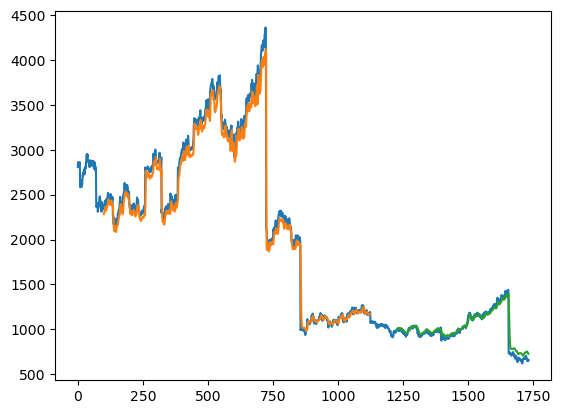

In [140]:
# shift train predictions for plotting
look_back=100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

# shift test predictions for plotting
look_back=100
testPredictPlot=np.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict

# plot base predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
Pplt.show()

Predicting next 45 days price

In [163]:
len(test_data)

607

In [164]:
x_input=test_data[507:].reshape(1,-1)
x_input.shape

(1, 100)

In [165]:
temp_input=list(x_input)

In [166]:
temp_input=temp_input[0].tolist()

In [167]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<45):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1, n_steps, 1))
        yhat=model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.02771389]
101
1 day input [0.19604729 0.19883634 0.19791555 0.19986388 0.19847603 0.20306662
 0.20453454 0.21075318 0.21063307 0.21630458 0.2165181  0.20421426
 0.20413419 0.20772392 0.20262624 0.21252802 0.21501014 0.21111348
 0.21274154 0.21938721 0.21755898 0.03150689 0.0295719  0.02883794
 0.0303459  0.02982545 0.03074624 0.03304153 0.0305861  0.02851767
 0.02668944 0.02686292 0.0230063  0.02646258 0.02858439 0.02635582
 0.02821074 0.02961194 0.03404238 0.02919825 0.0235134  0.02815736
 0.02544838 0.02632913 0.02171186 0.01447902 0.0159336  0.02127149
 0.02032401 0.02301964 0.01720135 0.01624053 0.01027544 0.00819366
 0.00791342 0.00386997 0.00684584 0.01080922 0.01796199 0.01270417
 0.01151649 0.01251735 0.01263745 0.01505285 0.01078253 0.01203694
 0.01243728 0.0091011  0.00995516 0.0084739  0.00870076 0.00595175
 0.         0.00044038 0.0006272  0.00528451 0.01262411 0.01119622
 0.01290435 0.01367834 0.01765507 0.01662752 0.01318458 0.01700117
 0.01337141 0.01478595 0.01585353

9 day output [[0.05674218]]
10 day input [0.21630458 0.2165181  0.20421426 0.20413419 0.20772392 0.20262624
 0.21252802 0.21501014 0.21111348 0.21274154 0.21938721 0.21755898
 0.03150689 0.0295719  0.02883794 0.0303459  0.02982545 0.03074624
 0.03304153 0.0305861  0.02851767 0.02668944 0.02686292 0.0230063
 0.02646258 0.02858439 0.02635582 0.02821074 0.02961194 0.03404238
 0.02919825 0.0235134  0.02815736 0.02544838 0.02632913 0.02171186
 0.01447902 0.0159336  0.02127149 0.02032401 0.02301964 0.01720135
 0.01624053 0.01027544 0.00819366 0.00791342 0.00386997 0.00684584
 0.01080922 0.01796199 0.01270417 0.01151649 0.01251735 0.01263745
 0.01505285 0.01078253 0.01203694 0.01243728 0.0091011  0.00995516
 0.0084739  0.00870076 0.00595175 0.         0.00044038 0.0006272
 0.00528451 0.01262411 0.01119622 0.01290435 0.01367834 0.01765507
 0.01662752 0.01318458 0.01700117 0.01337141 0.01478595 0.01585353
 0.02099125 0.02320647 0.02009715 0.01534643 0.01221042 0.01279759
 0.00723284 0.00798014 

17 day output [[0.07768305]]
18 day input [0.21111348 0.21274154 0.21938721 0.21755898 0.03150689 0.0295719
 0.02883794 0.0303459  0.02982545 0.03074624 0.03304153 0.0305861
 0.02851767 0.02668944 0.02686292 0.0230063  0.02646258 0.02858439
 0.02635582 0.02821074 0.02961194 0.03404238 0.02919825 0.0235134
 0.02815736 0.02544838 0.02632913 0.02171186 0.01447902 0.0159336
 0.02127149 0.02032401 0.02301964 0.01720135 0.01624053 0.01027544
 0.00819366 0.00791342 0.00386997 0.00684584 0.01080922 0.01796199
 0.01270417 0.01151649 0.01251735 0.01263745 0.01505285 0.01078253
 0.01203694 0.01243728 0.0091011  0.00995516 0.0084739  0.00870076
 0.00595175 0.         0.00044038 0.0006272  0.00528451 0.01262411
 0.01119622 0.01290435 0.01367834 0.01765507 0.01662752 0.01318458
 0.01700117 0.01337141 0.01478595 0.01585353 0.02099125 0.02320647
 0.02009715 0.01534643 0.01221042 0.01279759 0.00723284 0.00798014
 0.00665902 0.01006192 0.01010195 0.01063574 0.02771389 0.02909802
 0.03178204 0.03522111 0

25 day output [[0.09184556]]
26 day input [0.02982545 0.03074624 0.03304153 0.0305861  0.02851767 0.02668944
 0.02686292 0.0230063  0.02646258 0.02858439 0.02635582 0.02821074
 0.02961194 0.03404238 0.02919825 0.0235134  0.02815736 0.02544838
 0.02632913 0.02171186 0.01447902 0.0159336  0.02127149 0.02032401
 0.02301964 0.01720135 0.01624053 0.01027544 0.00819366 0.00791342
 0.00386997 0.00684584 0.01080922 0.01796199 0.01270417 0.01151649
 0.01251735 0.01263745 0.01505285 0.01078253 0.01203694 0.01243728
 0.0091011  0.00995516 0.0084739  0.00870076 0.00595175 0.
 0.00044038 0.0006272  0.00528451 0.01262411 0.01119622 0.01290435
 0.01367834 0.01765507 0.01662752 0.01318458 0.01700117 0.01337141
 0.01478595 0.01585353 0.02099125 0.02320647 0.02009715 0.01534643
 0.01221042 0.01279759 0.00723284 0.00798014 0.00665902 0.01006192
 0.01010195 0.01063574 0.02771389 0.02909802 0.03178204 0.03522111
 0.03897633 0.04278033 0.04649808 0.05007315 0.05348818 0.05674218
 0.05983987 0.06278738 0.065

33 day output [[0.1017566]]
34 day input [0.02646258 0.02858439 0.02635582 0.02821074 0.02961194 0.03404238
 0.02919825 0.0235134  0.02815736 0.02544838 0.02632913 0.02171186
 0.01447902 0.0159336  0.02127149 0.02032401 0.02301964 0.01720135
 0.01624053 0.01027544 0.00819366 0.00791342 0.00386997 0.00684584
 0.01080922 0.01796199 0.01270417 0.01151649 0.01251735 0.01263745
 0.01505285 0.01078253 0.01203694 0.01243728 0.0091011  0.00995516
 0.0084739  0.00870076 0.00595175 0.         0.00044038 0.0006272
 0.00528451 0.01262411 0.01119622 0.01290435 0.01367834 0.01765507
 0.01662752 0.01318458 0.01700117 0.01337141 0.01478595 0.01585353
 0.02099125 0.02320647 0.02009715 0.01534643 0.01221042 0.01279759
 0.00723284 0.00798014 0.00665902 0.01006192 0.01010195 0.01063574
 0.02771389 0.02909802 0.03178204 0.03522111 0.03897633 0.04278033
 0.04649808 0.05007315 0.05348818 0.05674218 0.05983987 0.06278738
 0.06559115 0.06825768 0.07079352 0.07320532 0.07549967 0.07768305
 0.07976168 0.08174165

41 day output [[0.10895529]]
42 day input [0.02815736 0.02544838 0.02632913 0.02171186 0.01447902 0.0159336
 0.02127149 0.02032401 0.02301964 0.01720135 0.01624053 0.01027544
 0.00819366 0.00791342 0.00386997 0.00684584 0.01080922 0.01796199
 0.01270417 0.01151649 0.01251735 0.01263745 0.01505285 0.01078253
 0.01203694 0.01243728 0.0091011  0.00995516 0.0084739  0.00870076
 0.00595175 0.         0.00044038 0.0006272  0.00528451 0.01262411
 0.01119622 0.01290435 0.01367834 0.01765507 0.01662752 0.01318458
 0.01700117 0.01337141 0.01478595 0.01585353 0.02099125 0.02320647
 0.02009715 0.01534643 0.01221042 0.01279759 0.00723284 0.00798014
 0.00665902 0.01006192 0.01010195 0.01063574 0.02771389 0.02909802
 0.03178204 0.03522111 0.03897633 0.04278033 0.04649808 0.05007315
 0.05348818 0.05674218 0.05983987 0.06278738 0.06559115 0.06825768
 0.07079352 0.07320532 0.07549967 0.07768305 0.07976168 0.08174165
 0.08362856 0.08542782 0.08714451 0.08878343 0.09034903 0.09184556
 0.09327694 0.0946469

In [172]:
day_new = np.arange(1,101)
day_pred=np.arange(101,146)

In [173]:
df3=df1.tolist()
df3.extend(lst_output)

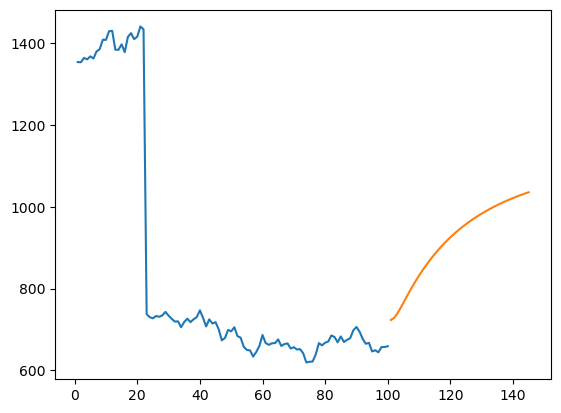

In [174]:
plt.plot(day_new,scaler.inverse_transform(df1[1634:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

Hence Using the LSTM model we have find out the price of INFOSYS share for the next 45 days.

# Hurrah!!!! We are done!